In [2]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta
%matplotlib inline

## 根据18年数据看不同时间人流量分布，以便抽样

In [15]:
### 解析 json 数据文件
import json

path = r"D:\\学习\\大三下\\数据科学实践\\project\\2018record3.jsons"
data = []
with open(path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        data += json.loads(line)['data']
data = pd.DataFrame(data)
columns = ['card_no', 'deal_date', 'deal_type', 'deal_money', 'deal_value', 'equ_no', 'company_name', 'station', 'car_no', 'conn_mark', 'close_date']
data = data[columns]  # 调整字段顺序

In [16]:
# 筛选出地铁项
data1 = data[(data["deal_type"]==("地铁出站")) | (data["deal_type"]==("地铁入站"))]

In [17]:
# 考虑到时间，去掉12：00-6：00的数据
data1["deal_date"] = pd.to_datetime(data1["deal_date"], format='%Y-%m-%d %H:%M:%S')
data1['deal_dayofweek'] = data1.deal_date.apply(lambda x: x.dayofweek)
data1['deal_date_day'] = data1.deal_date.apply(lambda x: x.day)
data1["hour_minute"] = data1["deal_date"].dt.strftime('%H:%M')
data1 = data1[(data1["deal_date"].dt.hour>=6)]
# data['deal_date_hour_minute'] = data.deal_date.apply(lambda x: x.hour.minute)

C:\Users\30138\AppData\Local\Temp\ipykernel_10508\3836326088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["deal_date"] = pd.to_datetime(data1["deal_date"], format='%Y-%m-%d %H:%M:%S')
C:\Users\30138\AppData\Local\Temp\ipykernel_10508\3836326088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['deal_dayofweek'] = data1.deal_date.apply(lambda x: x.dayofweek)
C:\Users\30138\AppData\Local\Temp\ipykernel_10508\3836326088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

C:\Users\30138\AppData\Local\Temp\ipykernel_10508\1415675203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31["cnt"] = 1


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '22:04'),
  Text(0.0, 0, '16:35'),
  Text(100.0, 0, '18:15'),
  Text(200.0, 0, '19:55'),
  Text(300.0, 0, '21:35'),
  Text(400.0, 0, '23:15'),
  Text(500.0, 0, '')])

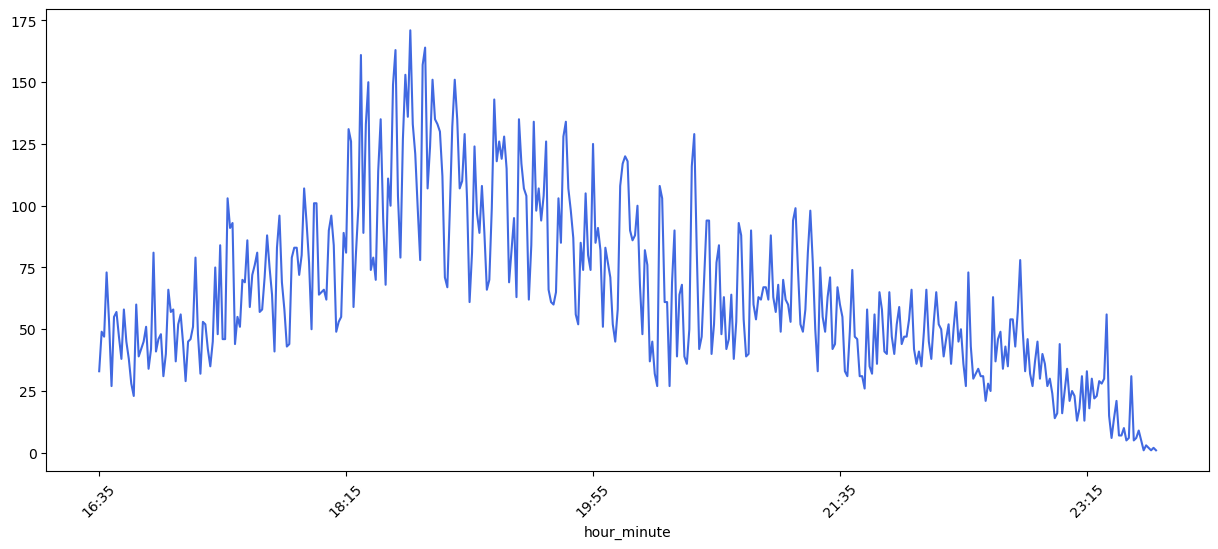

In [18]:
df_31 = data1[data1['deal_date_day'] == 31]
df_31["cnt"] = 1
plt.figure(figsize=(15,6))
df_31.groupby(['hour_minute'])["cnt"].count().plot(color='royalblue')
plt.xticks(rotation=45)

In [19]:
df_31["hour_minute"].sort_values()

632568     16:35
1305897    16:35
509350     16:35
1233351    16:35
1327670    16:35
           ...  
495        23:41
760285     23:45
152        23:48
671        23:48
757712     23:51
Name: hour_minute, Length: 27866, dtype: object

C:\Users\30138\AppData\Local\Temp\ipykernel_10508\915028047.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31["hour_minute"] = pd.to_datetime(df_31["hour_minute"], format='%H:%M')


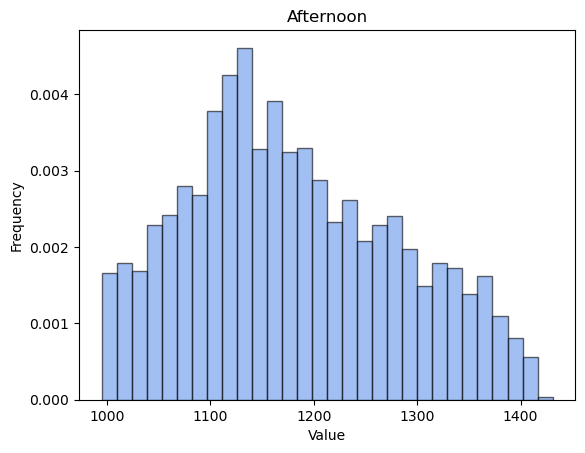

均值和标准差: 1179.963145051317 102.24852375316928


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import norm

# 定义正态分布函数
def normal_distribution(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*((x - mu)/sigma)**2)

df_31["hour_minute"] = pd.to_datetime(df_31["hour_minute"], format='%H:%M')

# 将时间数据转换为分钟数
data = df_31["hour_minute"].dt.hour * 60 +  df_31["hour_minute"].dt.minute

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='cornflowerblue', edgecolor='black')

# 计算直方图数据的均值和标准差
mu1, std1 = norm.fit(data)

# # 绘制拟合的正态分布曲线
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu1, std1)
# plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Afternoon")
# plt.title('Histogram with Normal Distribution Fit')
plt.show()
print("均值和标准差:", mu1, std1)

C:\Users\30138\AppData\Local\Temp\ipykernel_10508\3047260181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['hour_minute'] = df_1['deal_date'].dt.strftime('%H:%M')
C:\Users\30138\AppData\Local\Temp\ipykernel_10508\3047260181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["cnt"] = 1


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '10:41'),
  Text(0.0, 0, '06:00'),
  Text(50.0, 0, '06:50'),
  Text(100.0, 0, '07:40'),
  Text(150.0, 0, '08:30'),
  Text(200.0, 0, '09:20'),
  Text(250.0, 0, '10:10'),
  Text(300.0, 0, '11:00'),
  Text(350.0, 0, '')])

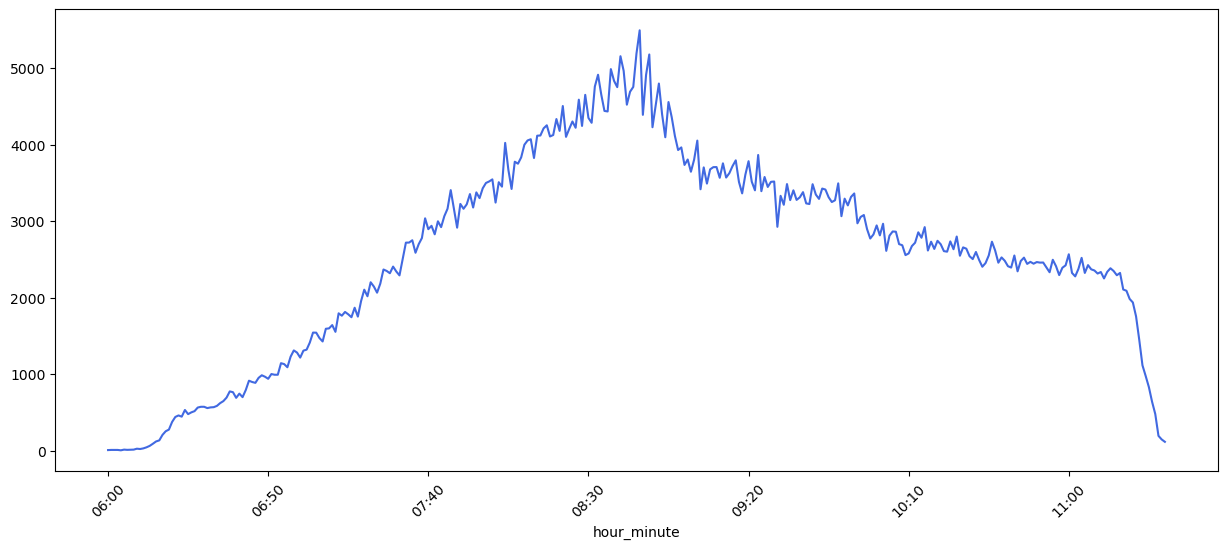

In [10]:
df_1 = data1[data1['deal_date_day'] == 1]
df_1['hour_minute'] = df_1['deal_date'].dt.strftime('%H:%M')
df_1["cnt"] = 1
plt.figure(figsize=(15,6))
df_1.groupby('hour_minute')["cnt"].count().plot(color='royalblue')
plt.xticks(rotation=45)

In [11]:
df_1["hour_minute"].sort_values()

32        06:00
34        06:00
14915     06:00
813       06:00
474       06:00
          ...  
992841    11:30
986425    11:30
985099    11:30
988565    11:30
992725    11:30
Name: hour_minute, Length: 852121, dtype: object

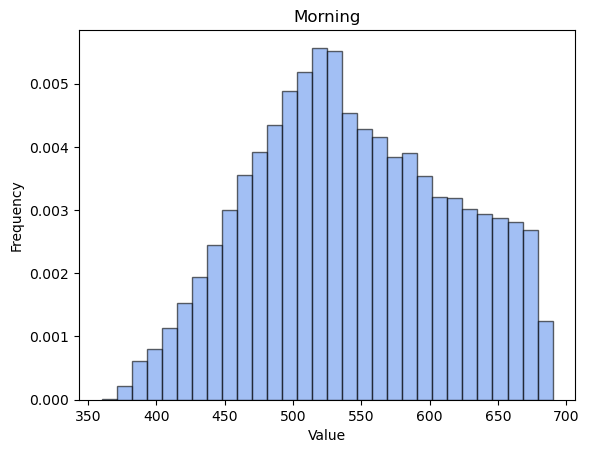

均值和标准差: 543.0529877799045 72.39119245543102


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import norm

# 定义正态分布函数
def normal_distribution(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*((x - mu)/sigma)**2)

df_1["hour_minute"] = pd.to_datetime(df_1["hour_minute"], format='%H:%M')
# 将时间数据转换为分钟数
data = df_1["hour_minute"].dt.hour * 60 +  df_1["hour_minute"].dt.minute

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='cornflowerblue', edgecolor='black')

# 计算直方图数据的均值和标准差
mu2, std2 = norm.fit(data)

# # 绘制拟合的正态分布曲线
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu2, std2)
# plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Morning")
# plt.title('Histogram with Normal Distribution Fit')
plt.show()
print("均值和标准差:", mu2, std2)

## 根据比例数据抽样

In [14]:
line_1 = pd.read_csv("D:\\学习\\大三下\\数据科学实践\\project\\zjc\\line1.csv")

### 由于普通正态分布抽样可能会抽到限制时间以外的数据，故此处抽样采取“截尾正态分布”抽样方法

#### (1)早上，人流量为10万，时间范围从6：00-11：30
6：00地铁统一开始运行时间，11：30为原始数据统计到最晚时间

(array([0.00157273, 0.00210182, 0.00255091, 0.00299182, 0.00365909,
        0.00421545, 0.00456091, 0.00511909, 0.00542364, 0.00566909,
        0.00583273, 0.00589909, 0.00561727, 0.00535273, 0.00490364,
        0.00448636, 0.00407273, 0.00347364, 0.00299273, 0.00250727,
        0.00202182, 0.00160091, 0.00122182, 0.00094   , 0.00071545,
        0.00049909, 0.00033818, 0.00027091, 0.00018455, 0.00011364]),
 array([360., 371., 382., 393., 404., 415., 426., 437., 448., 459., 470.,
        481., 492., 503., 514., 525., 536., 547., 558., 569., 580., 591.,
        602., 613., 624., 635., 646., 657., 668., 679., 690.]),
 <BarContainer object of 30 artists>)

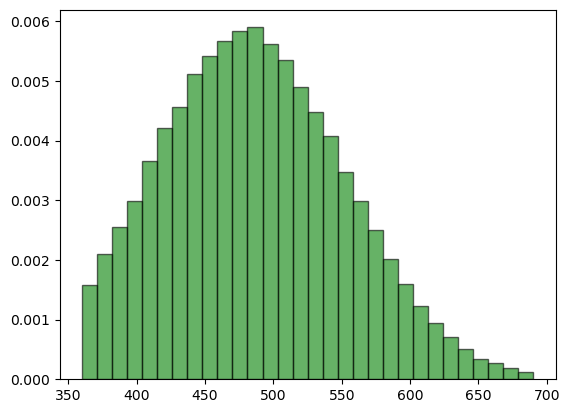

In [9]:
from scipy.stats import truncnorm
import random

# 截尾正态分布的参数
mu = 480  # 均值
sigma = std2  # 标准差
lower_bound = 360  # 下界
upper_bound = 690  # 上界

# 抽样次数
n_samples = 100000

# 使用SciPy的truncnorm函数从截尾正态分布中抽样
random.seed(123)
morning_in = truncnorm.rvs((lower_bound - mu) / sigma, (upper_bound - mu) / sigma, loc=mu, scale=sigma, size=n_samples)
morning_in = np.round(morning_in).astype(int)

#将抽样后的数据可视化
plt.hist(morning_in, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

In [10]:
morning_in = pd.DataFrame(morning_in)
morning_in.rename(columns={0:'morning_in_time'}, inplace=True)
morning_in.to_csv("morning_in_longtime.csv",index=False)

#### （1）下午晚上，人流量为10万，时间范围从16：30-00：00


(array([2.23296214e-03, 2.83028953e-03, 3.18240535e-03, 3.57527840e-03,
        3.93273942e-03, 4.11113586e-03, 4.29755011e-03, 4.50467706e-03,
        4.47126949e-03, 4.25144766e-03, 4.20200445e-03, 3.96146993e-03,
        3.57327394e-03, 3.25657016e-03, 2.85567929e-03, 2.40601336e-03,
        2.09599109e-03, 1.65567929e-03, 1.32628062e-03, 1.10378619e-03,
        8.55902004e-04, 6.42093541e-04, 4.56347439e-04, 3.47438753e-04,
        2.32516704e-04, 1.77060134e-04, 1.16926503e-04, 7.75055679e-05,
        4.87750557e-05, 3.40757238e-05]),
 array([ 990.        , 1004.96666667, 1019.93333333, 1034.9       ,
        1049.86666667, 1064.83333333, 1079.8       , 1094.76666667,
        1109.73333333, 1124.7       , 1139.66666667, 1154.63333333,
        1169.6       , 1184.56666667, 1199.53333333, 1214.5       ,
        1229.46666667, 1244.43333333, 1259.4       , 1274.36666667,
        1289.33333333, 1304.3       , 1319.26666667, 1334.23333333,
        1349.2       , 1364.16666667, 1379.133

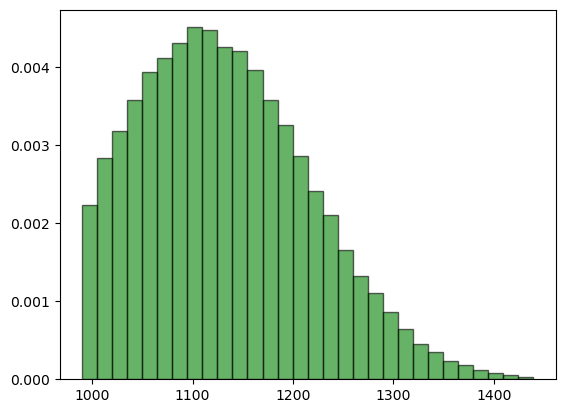

In [11]:
# 截尾正态分布的参数
mu = 1110  # 均值
sigma = std1  # 标准差
lower_bound = 990  # 下界
upper_bound = 1440  # 上界

# 抽样次数
n_samples = 100000

# 使用SciPy的truncnorm函数从截尾正态分布中抽样
random.seed(123)
eve_in = truncnorm.rvs((lower_bound - mu) / sigma, (upper_bound - mu) / sigma, loc=mu, scale=sigma, size=n_samples)
eve_in = np.round(eve_in).astype(int)

#将抽样后的数据可视化
plt.hist(eve_in, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

In [12]:
eve_in = pd.DataFrame(eve_in)
eve_in.rename(columns={0:'eve_in_time'}, inplace=True)
eve_in.to_csv("eve_in_longtime.csv",index=False)

#### （2）早高峰，人流量为10万，时间范围从7：00-9：00（深圳官方发布）

(array([0.005905 , 0.006835 , 0.00731  , 0.00763  , 0.007565 , 0.008375 ,
        0.0081075, 0.00867  , 0.008595 , 0.00906  , 0.00913  , 0.0090025,
        0.0092325, 0.0092825, 0.0093425, 0.009225 , 0.00944  , 0.0092275,
        0.00885  , 0.008935 , 0.00886  , 0.0087375, 0.008735 , 0.00849  ,
        0.0081775, 0.007845 , 0.0075475, 0.0072275, 0.00697  , 0.00769  ]),
 array([420., 424., 428., 432., 436., 440., 444., 448., 452., 456., 460.,
        464., 468., 472., 476., 480., 484., 488., 492., 496., 500., 504.,
        508., 512., 516., 520., 524., 528., 532., 536., 540.]),
 <BarContainer object of 30 artists>)

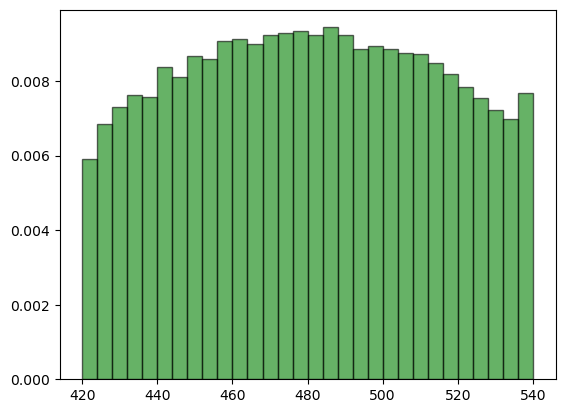

In [13]:
from scipy.stats import truncnorm

# 截尾正态分布的参数
mu = 480  # 均值
sigma = std2  # 标准差
lower_bound = 420  # 下界
upper_bound = 540  # 上界

# 抽样次数
n_samples = 100000

# 使用SciPy的truncnorm函数从截尾正态分布中抽样
random.seed(123)
morning_in = truncnorm.rvs((lower_bound - mu) / sigma, (upper_bound - mu) / sigma, loc=mu, scale=sigma, size=n_samples)
morning_in = np.round(morning_in).astype(int)

#将抽样后的数据可视化
plt.hist(morning_in, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

In [14]:
morning_in = pd.DataFrame(morning_in)
morning_in.rename(columns={0:'morning_in_time'}, inplace=True)
morning_in.to_csv("morning_in_shorttime.csv",index=False)

#### （2）晚高峰，人流量为10万，时间范围从17：30-19：30（深圳官方发布）


(array([0.006515 , 0.0075   , 0.00762  , 0.0080175, 0.00822  , 0.0081375,
        0.00814  , 0.008135 , 0.008685 , 0.0087025, 0.008525 , 0.0089375,
        0.0087575, 0.008935 , 0.0089425, 0.00889  , 0.008875 , 0.0090325,
        0.008605 , 0.00839  , 0.0087925, 0.0085225, 0.0084775, 0.008235 ,
        0.00827  , 0.00822  , 0.0079675, 0.007905 , 0.0078875, 0.00816  ]),
 array([1050., 1054., 1058., 1062., 1066., 1070., 1074., 1078., 1082.,
        1086., 1090., 1094., 1098., 1102., 1106., 1110., 1114., 1118.,
        1122., 1126., 1130., 1134., 1138., 1142., 1146., 1150., 1154.,
        1158., 1162., 1166., 1170.]),
 <BarContainer object of 30 artists>)

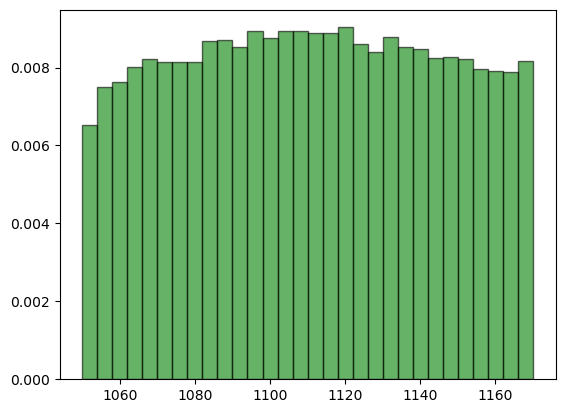

In [15]:
# 截尾正态分布的参数
mu = 1110  # 均值
sigma = std1  # 标准差
lower_bound = 1050  # 下界
upper_bound = 1170  # 上界

# 抽样次数
n_samples = 100000

# 使用SciPy的truncnorm函数从截尾正态分布中抽样
random.seed(123)
eve_in = truncnorm.rvs((lower_bound - mu) / sigma, (upper_bound - mu) / sigma, loc=mu, scale=sigma, size=n_samples)
eve_in = np.round(eve_in).astype(int)

#将抽样后的数据可视化
plt.hist(eve_in, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

In [37]:
eve_in = pd.DataFrame(eve_in)
eve_in.rename(columns={0:'eve_in_time'}, inplace=True)
eve_in.to_csv("eve_in_shorttime.csv",index=False)